# Healthcare Claims Data Analysis

## 1. Setup and data loading

In [9]:
text = 'In this section I import libraries and load the three CSV files into pandas DataFrames.'
print(text)

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')
pd.set_option('display.max_columns', 60)

# file paths – adjust if your folder is different
header_path = "/content/STONYBRK_20240531_HEADER.csv"
line_path = "/content/STONYBRK_20240531_LINE.csv"
code_path = "/content/STONYBRK_20240531_CODE.csv"

df_header = pd.read_csv(header_path)
df_line   = pd.read_csv(line_path)
df_code   = pd.read_csv(code_path)

df_header.head()

In this section I import libraries and load the three CSV files into pandas DataFrames.


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,RenderingProvFirstName,RenderingProvLastName,ReferringProviderNPI,ReferringProvFirstName,ReferringProvLastName,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,ServiceFromDate,ServiceToDate,PrimaryPayerName,PrimaryPayerCode,PrimaryPayerCFI,SecondaryPayer,SecondaryPayerCode,SecondaryPayerCFI,TertianaryPayer,TertianaryPayerCode,TertianaryPayerCFI,DRG,AdmitType,DischargeStatus,AdmitDx,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/25/23 0:00,9/25/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/27/23 0:00,9/27/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,UNITED COMMUNITY PLAN GOVT PROGRAM,405,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/29/23 0:00,9/29/23 0:00,MMIS,104,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,EMPIRE BLUE HMO,94,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN


##Part 1 – Data exploration

In [10]:
# basic shapes
print('HEADER shape:', df_header.shape)
print('LINE shape:', df_line.shape)
print('CODE shape:', df_code.shape)

# data types
print('\nHEADER dtypes:')
print(df_header.dtypes)

print('\nLINE dtypes::')
print(df_line.dtypes)

print('\nCODE dtypes:')
print(df_code.dtypes)


HEADER shape: (388, 43)
LINE shape: (520, 28)
CODE shape: (1536, 9)

HEADER dtypes:
ClientId                     int64
ProspectiveClaimId           int64
ClaimType                   object
BillingProviderNPI           int64
BillingProvFirstName        object
BillingProvLastName        float64
AttendingProviderNPI       float64
AttendingProvFirstName      object
AttendingProvLastName       object
RenderingProviderNPI         int64
RenderingProvFirstName      object
RenderingProvLastName       object
ReferringProviderNPI       float64
ReferringProvFirstName      object
ReferringProvLastName       object
OperatingProviderNPI       float64
OperatingProvFirstName     float64
OperatingProvLastName      float64
ServiceFromDate             object
ServiceToDate               object
PrimaryPayerName            object
PrimaryPayerCode             int64
PrimaryPayerCFI             object
SecondaryPayer             float64
SecondaryPayerCode         float64
SecondaryPayerCFI          float64
Tertia

In [11]:
# convert header service dates to datetime
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'], errors='coerce')
df_header['ServiceToDate']   = pd.to_datetime(df_header['ServiceToDate'], errors='coerce')

# missing values
print('Missing values in HEADER:')
print(df_header.isna().sum())

print('\nMissing values in LINE:')
print(df_line.isna().sum())

print('\nMissing values in CODE:')
print(df_code.isna().sum())


Missing values in HEADER:
ClientId                     0
ProspectiveClaimId           0
ClaimType                    0
BillingProviderNPI           0
BillingProvFirstName         0
BillingProvLastName        388
AttendingProviderNPI       386
AttendingProvFirstName     386
AttendingProvLastName      386
RenderingProviderNPI         0
RenderingProvFirstName       0
RenderingProvLastName        0
ReferringProviderNPI       301
ReferringProvFirstName     301
ReferringProvLastName      301
OperatingProviderNPI       388
OperatingProvFirstName     388
OperatingProvLastName      388
ServiceFromDate              0
ServiceToDate                0
PrimaryPayerName             0
PrimaryPayerCode             0
PrimaryPayerCFI              0
SecondaryPayer             388
SecondaryPayerCode         388
SecondaryPayerCFI          388
TertianaryPayer            388
TertianaryPayerCode        388
TertianaryPayerCFI         388
DRG                        388
AdmitType                  388
DischargeStat

/tmp/ipython-input-968243664.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'], errors='coerce')
/tmp/ipython-input-968243664.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceToDate']   = pd.to_datetime(df_header['ServiceToDate'], errors='coerce')


In [12]:
# how many unique claims
unique_claims = df_header['ProspectiveClaimId'].nunique()
print('Number of unique claims:', unique_claims)

# date ranges for services
print('ServiceFromDate range:', df_header['ServiceFromDate'].min(), 'to', df_header['ServiceFromDate'].max())
print('ServiceToDate range:', df_header['ServiceToDate'].min(), 'to', df_header['ServiceToDate'].max())

# average service lines and diagnosis codes per claim
lines_per_claim = df_line.groupby('ProspectiveClaimId')['LinePos'].count()
dx_per_claim    = df_code.groupby('ProspectiveClaimId')['CodePos'].count()

print('Average number of service lines per claim:', lines_per_claim.mean())
print('Average number of diagnosis codes per claim:', dx_per_claim.mean())

Number of unique claims: 388
ServiceFromDate range: 2023-09-25 00:00:00 to 2024-05-29 00:00:00
ServiceToDate range: 2023-09-25 00:00:00 to 2024-05-29 00:00:00
Average number of service lines per claim: 1.3402061855670102
Average number of diagnosis codes per claim: 3.9587628865979383


## Part 2 – Relational data analysis

### Question 1 – Top billing providers by number of claims

   BillingProviderNPI                  BillingProviderName  ClaimCount
5          1821035601                        SB INTERNISTS         152
0          1063468536               SB SURGICAL ASSOCIATES          81
2          1154376309     NEW YORK SPINE AND BRAIN SURGERY          69
4          1538114723  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          40
3          1437105905            SB PSYCHIATRIC ASSOCIATES          36


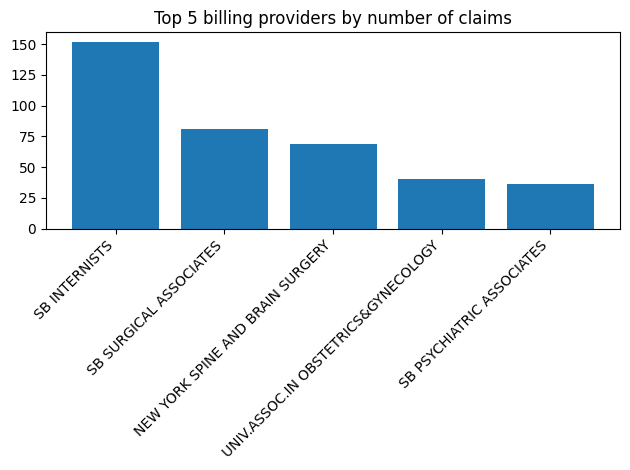

In [13]:
# create a simple provider name from first and last name
def make_provider_name(row):
    first = str(row['BillingProvFirstName']).strip() if pd.notna(row['BillingProvFirstName']) else ''
    last  = str(row['BillingProvLastName']).strip() if pd.notna(row['BillingProvLastName']) else ''
    if first and last:
        return first + ' ' + last
    if first:
        return first
    if last:
        return last
    return 'UNKNOWN'

df_header['BillingProviderName'] = df_header.apply(make_provider_name, axis=1)

# count claims per billing provider
provider_counts = (df_header
    .groupby(['BillingProviderNPI', 'BillingProviderName'])['ProspectiveClaimId']
    .nunique()
    .reset_index(name='ClaimCount')
    .sort_values('ClaimCount', ascending=False)
)

top5_providers = provider_counts.head(5)
print(top5_providers)

# bar chart of top 5 providers
plt.figure()
plt.bar(top5_providers['BillingProviderName'], top5_providers['ClaimCount'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 billing providers by number of claims')
plt.tight_layout()
plt.show()

## **Interpretation (Q1)**

1.   List item
2.   List item



The results show that a small number of provider groups have the highest claim counts. This means most of the billing activity in this sample is coming from a few busy practices, such as large medical or surgical groups.


### Question 2 – Payer mix

             PrimaryPayerName  ClaimCount  PercentOfClaims
0                    MEDICARE         242        62.371134
1             HEALTHFIRST FFS          46        11.855670
2  FIDELIS/BETTER HEALTH PLAN          26         6.701031
3                HIP MEDICAID          17         4.381443
4       HEALTHFIRST CAPITATED          10         2.577320


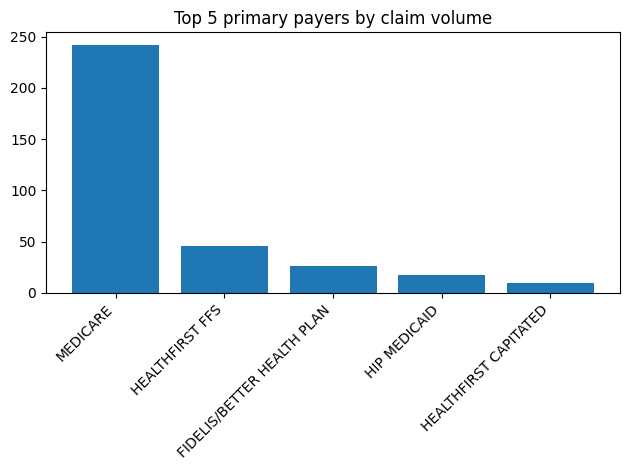

In [14]:
# count claims by primary payer
payer_counts = df_header['PrimaryPayerName'].value_counts(dropna=False).reset_index()
payer_counts.columns = ['PrimaryPayerName', 'ClaimCount']

total_claims = payer_counts['ClaimCount'].sum()
payer_counts['PercentOfClaims'] = payer_counts['ClaimCount'] / total_claims * 100

top5_payers = payer_counts.head(5)
print(top5_payers)

# simple bar chart
plt.figure()
plt.bar(top5_payers['PrimaryPayerName'].astype(str), top5_payers['ClaimCount'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 primary payers by claim volume')
plt.tight_layout()
plt.show()

## **Interpretation (Q2)**

In this sample Medicare is the main payer and makes up most of the claims. The remaining claims come from a mix of Medicaid and commercial plans.

### Question 3 – Most common diagnosis codes

In [15]:
dx_counts = df_code['CodeValue'].value_counts().reset_index().head(10)
dx_counts.columns = ['CodeValue', 'Frequency']
dx_counts

,CodeValue,Frequency
0,J96.01,62
1,I10,49
2,E78.5,49
3,G93.5,34
4,D64.9,29
5,I25.10,27
6,I61.9,26
7,I48.91,24
8,I60.8,24
9,I50.9,22


## **Interpretation (Q3)**

The top diagnosis codes include acute respiratory failure, hypertension, heart disease, and other serious conditions.

### Question 4 – Most common procedure codes (HCPCS)

   HCPCS  Frequency                                ClientProcedureName
0  99291         68                  CRITICAL CARE, INITIAL FIRST HOUR
1  99233         48  SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH...
2  99213         39  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...
3  99223         33  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF ...
4  99222         32   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF ...
5  99232         21  SUBSEQ. HOSPITAL  CARE PER DAY,FOR THE E&M OF ...
6  90833         16  PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATI...
7  99204         14  OFFICE/OUTPT VISIT FOR  THE E & M OF A NEW PAT...
8  99214         14   OFFICE  OR OUTPT. VISIT ESTABLISHED PATIENT,D...
9  92557         14  COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION;...


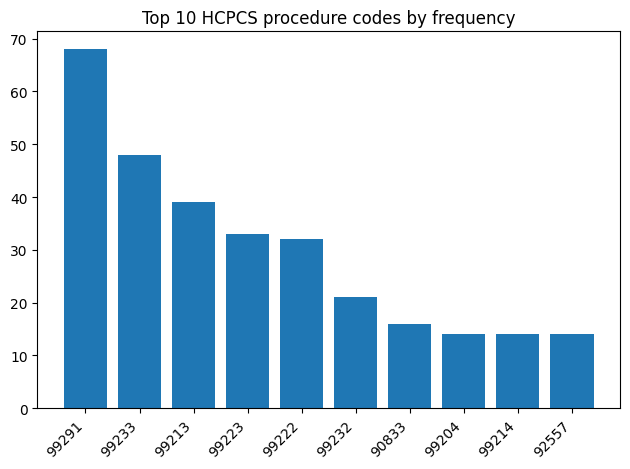

In [16]:
hcpcs_counts = df_line['HCPCS'].value_counts().reset_index().head(10)
hcpcs_counts.columns = ['HCPCS', 'Frequency']

# attach a common client procedure name if it exists
proc_names = (df_line
    .groupby('HCPCS')['ClientProcedureName']
    .agg(lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else None)
    .reset_index()
)

hcpcs_with_names = hcpcs_counts.merge(proc_names, on='HCPCS', how='left')
print(hcpcs_with_names)

# bar chart
plt.figure()
plt.bar(hcpcs_counts['HCPCS'].astype(str), hcpcs_counts['Frequency'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 HCPCS procedure codes by frequency')
plt.tight_layout()
plt.show()

## **Interpretation (Q4)**

Critical care (99291) and inpatient evaluation and management codes appear very often. There are also office visit codes. This mix of procedures lines up with the serious diagnoses seen earlier and suggests a sicker inpatient population with some outpatient activity.


### Question 5 – Place of service

In [17]:
pos_counts = df_header['PlaceOfService'].value_counts(dropna=False)
pos_percent = pos_counts / pos_counts.sum() * 100

# map the common CMS POS codes
pos_map = {
    11: 'Office',
    21: 'Inpatient Hospital',
    22: 'Outpatient Hospital',
    23: 'Emergency Room - Hospital'
}

pos_counts_named = pos_counts.rename(index=pos_map)
pos_percent_named = pos_percent.rename(index=pos_map)

print('Counts by place of service:')
print(pos_counts_named)

print('\nPercent of claims by place of service:')
print(pos_percent_named)

Counts by place of service:
PlaceOfService
Inpatient Hospital           231
Office                       132
Outpatient Hospital           24
Emergency Room - Hospital      1
Name: count, dtype: int64

Percent of claims by place of service:
PlaceOfService
Inpatient Hospital           59.536082
Office                       34.020619
Outpatient Hospital           6.185567
Emergency Room - Hospital     0.257732
Name: count, dtype: float64


## **Interpretation (Q5)**

Most claims come from inpatient hospital stays, followed by office visits. Only a small share of claims come from outpatient hospital or emergency room settings. This supports the idea that the dataset focuses on higher-acuity encounters.


## Part 3 – Advanced analysis with joins

### Question 6 – Claims with many service lines

In [18]:
# make sure charges are numeric
df_line['Charges'] = pd.to_numeric(df_line['Charges'], errors='coerce')

# join header and line files
claims_hl = pd.merge(
    df_header,
    df_line,
    on=['ClientId', 'ProspectiveClaimId'],
    how='inner',
    suffixes=('_hdr', '_line')
)

# count lines and sum charges per claim
line_summary = (claims_hl
    .groupby('ProspectiveClaimId')
    .agg(NumLines=('LinePos', 'count'),
         TotalCharges=('Charges', 'sum'),
         BillingProviderName=('BillingProviderName', 'first'))
    .reset_index()
)

claims_with_5plus = line_summary[line_summary['NumLines'] >= 5].sort_values('NumLines', ascending=False)
claims_with_5plus.head()

,ProspectiveClaimId,NumLines,TotalCharges,BillingProviderName
151,36794825,7,1163,SB CHILDREN'S SERVICE
79,36668119,6,1030,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
125,36740402,6,945,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
109,36710175,5,873,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
135,36757684,5,873,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY


## **Interpretation (Q6)**

A small group of claims have five or more service lines. These claims usually represent more complex encounters with multiple billed services and higher total charges, which may need extra attention from coding and billing teams.


### Question 7 – Diagnosis–procedure combinations for CPT 99291

In [19]:
# join header+line with diagnosis codes
claims_hlc = pd.merge(
    claims_hl,
    df_code,
    on=['ClientId', 'ProspectiveClaimId'],
    how='inner'
)

# filter to HCPCS 99291 and count diagnosis codes
claims_hlc['HCPCS_str'] = claims_hlc['HCPCS'].astype(str)
critical_care = claims_hlc[claims_hlc['HCPCS_str'] == '99291']

dx_for_99291 = critical_care['CodeValue'].value_counts().reset_index()
dx_for_99291.columns = ['CodeValue', 'Frequency']
dx_for_99291.head(10)

,CodeValue,Frequency
0,J96.01,53
1,G93.5,34
2,E78.5,33
3,I61.9,26
4,D64.9,25
5,I10,24
6,I60.8,24
7,I95.9,20
8,D72.829,19
9,I67.848,17


## **Interpretation (Q7)**

The diagnosis codes that show up most often with CPT 99291 include acute respiratory failure and serious brain or heart conditions. This is expected, because critical care services are usually used for very sick patients in intensive care.


### Question 8 – Charges by primary payer

In [20]:
# total charges per claim
charges_per_claim = (claims_hl
    .groupby(['ProspectiveClaimId', 'PrimaryPayerName'])['Charges']
    .sum()
    .reset_index(name='TotalCharges')
)

# summarize by payer
payer_summary = (charges_per_claim
    .groupby('PrimaryPayerName')['TotalCharges']
    .agg(['sum', 'mean', 'count'])
    .reset_index()
    .rename(columns={'sum': 'TotalCharges', 'mean': 'AvgChargesPerClaim', 'count': 'NumClaims'})
    .sort_values('TotalCharges', ascending=False)
)

payer_summary.head(10)

,PrimaryPayerName,TotalCharges,AvgChargesPerClaim,NumClaims
17,MEDICARE,131008,541.355372,242
12,HEALTHFIRST FFS,29794,647.695652,46
9,FIDELIS/BETTER HEALTH PLAN,10810,415.769231,26
14,HIP MEDICAID,10014,589.058824,17
0,AETNA,6930,1155.000000,6
4,DIRECT SELF PAY,6575,1095.833333,6
21,UNITED COMMUNITY PLAN GOVT PROGRAM,5175,1035.000000,5
10,HEALTHFIRST CAPITATED,4905,490.500000,10
7,EMPIRE BLUE SR,4620,1155.000000,4
15,MAGNACARE,3465,1155.000000,3


## **Interpretation (Q8)**

Medicare has the highest total charges because it also has the most claims. Some smaller payers can have higher average charges per claim, which may reflect different case mix or types of services for those members.


## Part 4 – Custom question

**Custom question:**

> How do average total charges per claim differ by place of service?


          PlaceOfServiceName  NumClaims  AvgCharges  MedianCharges  \
0  Emergency Room - Hospital          1  410.000000          410.0   
1         Inpatient Hospital        231  678.593074          525.0   
2                     Office        132  423.901515          430.0   
3        Outpatient Hospital         24  989.625000          430.0   

   TotalCharges  
0           410  
1        156755  
2         55955  
3         23751  


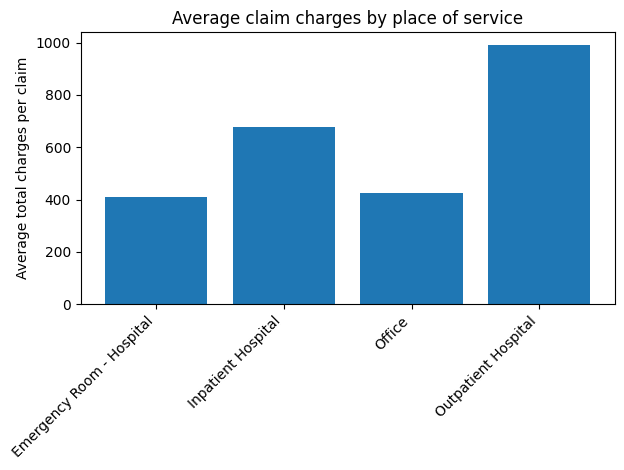

In [21]:
charges_pos = (claims_hl
    .groupby(['ProspectiveClaimId', 'PlaceOfService_hdr'])['Charges']
    .sum()
    .reset_index(name='TotalCharges')
)

charges_pos['PlaceOfServiceName'] = charges_pos['PlaceOfService_hdr'].map(pos_map)

pos_charge_summary = (charges_pos
    .groupby('PlaceOfServiceName')['TotalCharges']
    .agg(['count', 'mean', 'median', 'sum'])
    .reset_index()
    .rename(columns={'count': 'NumClaims', 'mean': 'AvgCharges', 'median': 'MedianCharges', 'sum': 'TotalCharges'})
)

print(pos_charge_summary)

# bar chart of average charges by place of service
plt.figure()
plt.bar(pos_charge_summary['PlaceOfServiceName'], pos_charge_summary['AvgCharges'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average total charges per claim')
plt.title('Average claim charges by place of service')
plt.tight_layout()
plt.show()

## **Interpretation (Q9)**

In this dataset, inpatient and outpatient hospital claims have higher average charges than office visits. This is what we would expect because hospital encounters usually require more staff, equipment, and time compared with a typical office visit.
